
#*Loading the dataset and converting in the form of a dataframe*

In [ ]:
pip install matplotlib seaborn pandas

In [ ]:
import pandas as pd
hi= pd.read_csv('database[2].csv')
df = pd.DataFrame(hi)
print(df)

FileNotFoundError: [Errno 2] No such file or directory: 'database[2].csv'

# *Data Cleaning*

# *Removing the unnecessary columns from the dataset*


In [ ]:
columns_to_remove = ['ID', 'Source', 'Location Source', 'Magnitude Type', 'Magnitude Source', 'Status',
                     'Depth Error', 'Depth Seismic Stations', 'Magnitude Error',
                     'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance',
                     'Horizontal Error', 'Root Mean Square']

In [ ]:
df = df.drop(columns = columns_to_remove)
print(df.head())

         Date      Time  Latitude  Longitude        Type  Depth  Magnitude
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6        6.0
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0        5.8
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0        6.2
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0        5.8
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0        5.8


# *Removing the null values*

In [ ]:
print(df.isnull().sum())

Date         0
Time         0
Latitude     0
Longitude    0
Type         0
Depth        0
Magnitude    0
dtype: int64


In [ ]:
print(df["Type"].unique())

['Earthquake' 'Nuclear Explosion' 'Explosion' 'Rock Burst']


In [ ]:
df = df[df["Type"] == "Earthquake"]
print(df.head())

         Date      Time  Latitude  Longitude        Type  Depth  Magnitude
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6        6.0
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0        5.8
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0        6.2
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0        5.8
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0        5.8


In [ ]:
print(df["Type"].unique())

['Earthquake']


# *Data Describing*

In [ ]:
print(df["Magnitude"].unique())
print(df["Magnitude"].min())
print(df['Magnitude'].describe())
print(df['Depth'].describe())

[6.   5.8  6.2  6.7  5.9  8.2  5.5  5.6  6.1  8.7  5.7  7.3  6.5  6.4
 6.3  7.   7.4  7.6  6.8  7.7  7.2  7.8  6.9  6.6  7.5  7.1  6.35 8.1
 7.9  8.   5.55 6.47 6.31 5.52 5.75 5.66 5.82 5.84 5.51 6.45 6.57 5.77
 5.53 5.69 5.67 5.89 5.58 8.3  5.94 8.4  6.48 5.97 9.1  8.6  5.88 8.8
 5.72 6.02 5.73 5.64]
5.5
count    23232.000000
mean         5.882763
std          0.424032
min          5.500000
25%          5.600000
50%          5.700000
75%          6.000000
max          9.100000
Name: Magnitude, dtype: float64
count    23232.000000
mean        71.313913
std        122.968384
min         -1.100000
25%         15.000000
50%         33.000000
75%         54.800000
max        700.000000
Name: Depth, dtype: float64


# *Feature Engineering and Scaling*

In [ ]:
import numpy as np
df['result'] = np.where(df['Magnitude'] >  5.9 , 1, 0)
df['land'] = np.where(df['Depth'] > 71.5, 1, 0 )
print(df.head())

         Date      Time  Latitude  Longitude        Type  Depth  Magnitude  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6        6.0   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0        5.8   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0        6.2   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0        5.8   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0        5.8   

   result  land  
0       1     1  
1       0     1  
2       1     0  
3       0     0  
4       0     0  


# *  EDA(Exploratory Data Analysis)*

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Magintude')

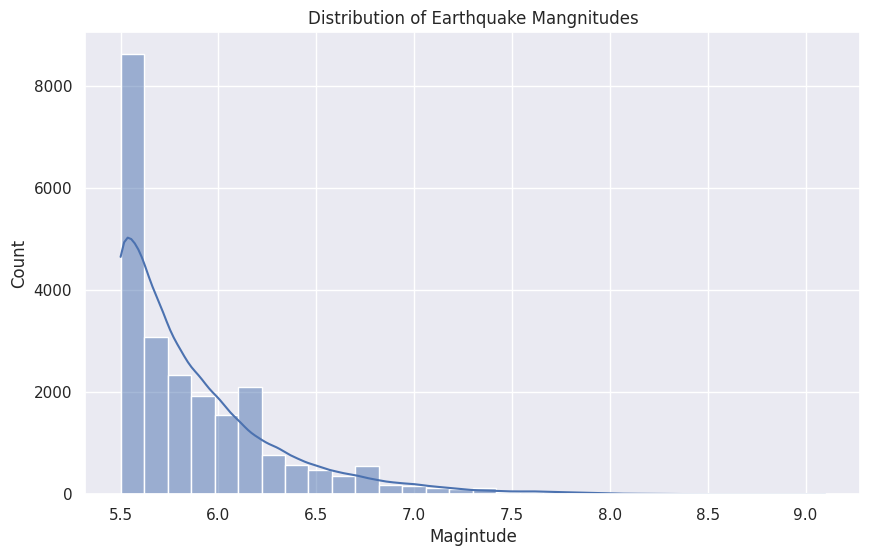

In [ ]:
sns.set()
plt.figure(figsize=(10, 6))
sns.histplot(df["Magnitude"], kde = True, bins = 30)
plt.title('Distribution of Earthquake Mangnitudes')
plt.xlabel('Magintude')

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Type', axis = 1)
y = df['Type']


In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 )

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(18585, 8) (10000, 10) (2000,) (4647,)


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clt = make_pipeline(StandardScaler(), SVC(gamma = 'auto'))
clt.fit(X, y)
